Decision Tree - Accuracy: 0.97, Precision: 0.97, Recall: 0.97, F1 Score: 0.97
KNN - Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1 Score: 1.00
Perceptron - Accuracy: 0.63, Precision: 0.49, Recall: 0.63, F1 Score: 0.53


c:\Users\asaye\anaconda4\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\asaye\anaconda4\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


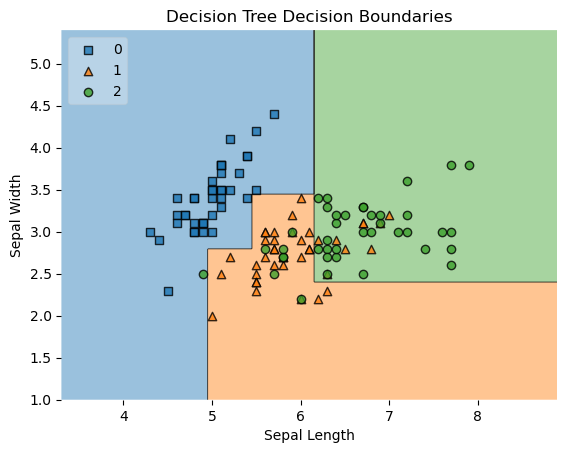

c:\Users\asaye\anaconda4\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


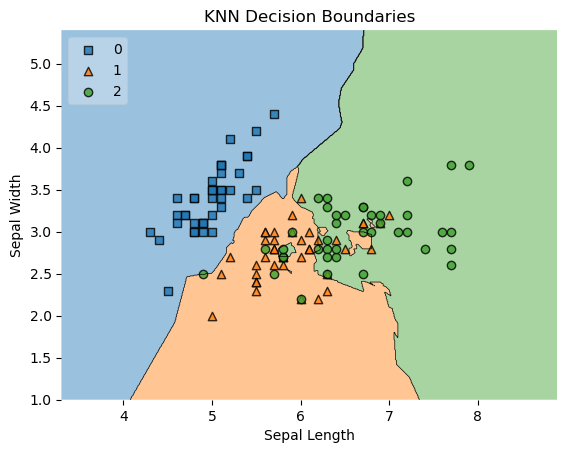

c:\Users\asaye\anaconda4\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


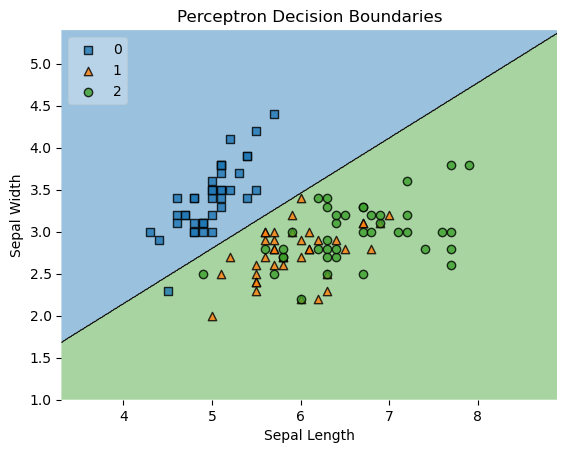

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.plotting import plot_decision_regions

# Load the dataset
data = pd.read_csv("Iris.csv")

# Prepare the features and target
X = data.drop(columns=["Id", "Species"])
y = data["Species"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize classifiers
dt_clf = DecisionTreeClassifier(max_depth=3)
knn_clf = KNeighborsClassifier(n_neighbors=5)
perceptron_clf = Perceptron(max_iter=1000, tol=1e-3)

# Train classifiers
dt_clf.fit(X_train, y_train)
knn_clf.fit(X_train, y_train)
perceptron_clf.fit(X_train, y_train)

# Predictions
dt_pred = dt_clf.predict(X_test)
knn_pred = knn_clf.predict(X_test)
perceptron_pred = perceptron_clf.predict(X_test)

# Evaluate performance
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"{model_name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")

evaluate_model(y_test, dt_pred, "Decision Tree")
evaluate_model(y_test, knn_pred, "KNN")
evaluate_model(y_test, perceptron_pred, "Perceptron")

# Visualize decision boundaries
def plot_model(model, X, y, title):
    plot_decision_regions(X.values, y.values, clf=model, legend=2)
    plt.title(title)
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.show()

# Use only two features for visualization purposes
X_vis = X_train.iloc[:, [0, 1]]
y_vis = y_train.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

dt_clf.fit(X_vis, y_vis)
knn_clf.fit(X_vis, y_vis)
perceptron_clf.fit(X_vis, y_vis)

plot_model(dt_clf, X_vis, y_vis, "Decision Tree Decision Boundaries")
plot_model(knn_clf, X_vis, y_vis, "KNN Decision Boundaries")
plot_model(perceptron_clf, X_vis, y_vis, "Perceptron Decision Boundaries")